In [1]:
import pandas as pd
data = pd.read_csv('clean_data.csv')
data.head()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
0,3,Order Finished,Muhammed Mac Intyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones & Communication
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories


In [2]:
data['order_date'] = pd.to_datetime(data['order_date'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              5499 non-null   int64         
 1   order_status          5499 non-null   object        
 2   customer              5499 non-null   object        
 3   order_date            5499 non-null   datetime64[ns]
 4   order_quantity        5499 non-null   int64         
 5   sales                 5499 non-null   int64         
 6   discount              5499 non-null   float64       
 7   discount_value        5499 non-null   int64         
 8   product_category      5499 non-null   object        
 9   product_sub_category  5499 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 429.7+ KB
None


График - Общее количество заказов по годам


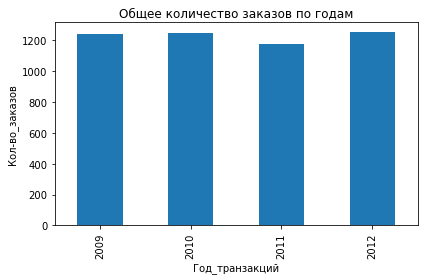

In [3]:
data['year_transaction'] = data['order_date'].dt.year # взяли год

print("График - Общее количество заказов по годам")
import matplotlib.pyplot as plt

# groupby().count() вычисляет количество строк для каждой комбинации группы, игнорируя значения None и Nan
data_year = data[data['order_status'] == 'Order Finished'].groupby(['year_transaction'])['order_quantity'].count()
data_year.plot(x='year_transaction',y='order_quantity', kind='bar', title='Общее количество заказов по годам')
plt.xlabel('Год_транзакций')
plt.ylabel('Кол-во_заказов')
#tight_layout изменяет размер подграфика, чтобы включить его в область графика. 
plt.tight_layout()
plt.show()

In [4]:
#Таблица кол-во заказов по годам

# as_index = falce - не переносить в новый дата фрейм индексы
data_year1 = data[data['order_status'] == 'Order Finished'].groupby(['year_transaction'], as_index = False)
['order_quantity'].count()
data_year1 = pd.DataFrame(data_year1)
data_year1.columns
data_year1

,year_transaction,order_quantity
0,2009,1244
1,2010,1248
2,2011,1178
3,2012,1254


In [5]:
data_year1.rename(columns={'year_transaction': 'year', 'order_quantity': 'number_of_order'}, inplace=True)
##shift - Индекс сдвига на желаемое количество периодов. От изменения в скобках числа меняется кло-во NaN в последних столбцах
data_year1['number_of_order_lag1'] = data_year1['number_of_order'].shift(1)
data_year1['growth_of_order'] = ((data_year1['number_of_order'] / data_year1['number_of_order_lag1']) -1)*100
data_year1

,year,number_of_order,number_of_order_lag1,growth_of_order
0,2009,1244,NaN,NaN
1,2010,1248,1244.0,0.321543
2,2011,1178,1248.0,-5.608974
3,2012,1254,1178.0,6.451613


График - Рост заказов(%) по годам


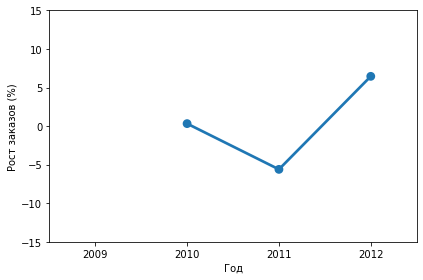

In [6]:
print("График - Рост заказов(%) по годам")
#Seaborn —  библиотека для создания статистических графиков
import seaborn as sns
sns.pointplot(data = data_year1, 
              x='year', 
              y='growth_of_order')

plt.ylim(-15,15) # диапозон у
plt.tight_layout()
plt.xlabel('Год')
plt.ylabel('Рост заказов (%)')
plt.show()

График - Общий объем продаж по годам


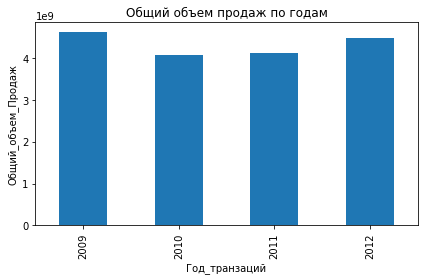

In [7]:
print("График - Общий объем продаж по годам")
data_year = data[data['order_status'] == 'Order Finished'].groupby(['year_transaction'])['sales'].sum()
data_year.plot(x='year_transaction', y='sales', kind='bar', title='Общий объем продаж по годам')
plt.xlabel('Год_транзаций')
plt.ylabel('Общий_объем_Продаж')
plt.tight_layout()
plt.show()

In [8]:
data_year2 = data[data['order_status'] == 'Order Finished'].groupby(['year_transaction'], as_index=False)['sales'].sum()
data_year2 = pd.DataFrame(data_year2)
data_year2.columns
data_year2

,year_transaction,sales
0,2009,4613872681
1,2010,4059100607
2,2011,4112036186
3,2012,4482983158


In [9]:
data_year2.rename(columns={'year_transaction': 'year', 'sales': 'total_sales'}, inplace=True)
#lag -разница
data_year2['total_sales_lag1'] = data_year2['total_sales'].shift(1) #сдвиг на 1
data_year2['growth_of_sales'] = ((data_year2['total_sales'] / data_year2['total_sales_lag1']) -1)*100
data_year2

,year,total_sales,total_sales_lag1,growth_of_sales
0,2009,4613872681,NaN,NaN
1,2010,4059100607,4.613873e+09,-12.024000
2,2011,4112036186,4.059101e+09,1.304121
3,2012,4482983158,4.112036e+09,9.021005


График - Рост продаж(%) по годам


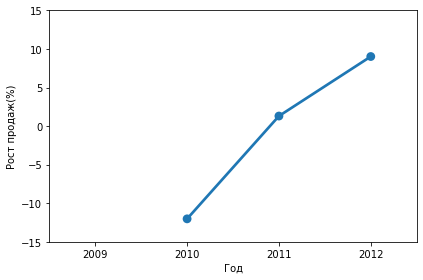

In [10]:
print("График - Рост продаж(%) по годам")
sns.pointplot(data = data_year2, 
              x='year', 
              y='growth_of_sales')
plt.ylim(-15,15)
plt.tight_layout()
plt.xlabel('Год')
plt.ylabel('Рост продаж(%)')
plt.show()

In [11]:
print("Сводная таблица")
    
# merge - Объединение выполняется по столбцам или индексам. 
# how='inner'- связь Общихд анных, чтобы не совпадали по несколько раз
data_year = pd.merge(data_year1, data_year2, on='year', how='inner')
data_year

Сводная таблица


,year,number_of_order,number_of_order_lag1,growth_of_order,total_sales,total_sales_lag1,growth_of_sales
0,2009,1244,NaN,NaN,4613872681,NaN,NaN
1,2010,1248,1244.0,0.321543,4059100607,4.613873e+09,-12.024000
2,2011,1178,1248.0,-5.608974,4112036186,4.059101e+09,1.304121
3,2012,1254,1178.0,6.451613,4482983158,4.112036e+09,9.021005


Сводный график


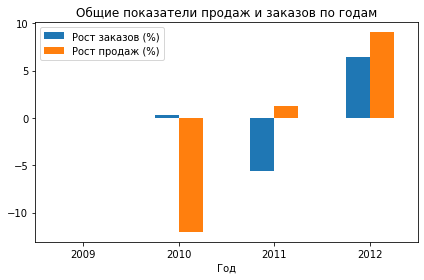

In [12]:
print("Сводный график")
data_year.plot(x='year', y=['growth_of_order','growth_of_sales'], kind='bar', title='Общие показатели продаж и заказов по годам')
plt.xlabel('Год')
plt.xticks(rotation=0) # rotation - для подписей оси x (направление)
plt.legend(['Рост заказов (%)','Рост продаж (%)'])
plt.tight_layout()
plt.show()

In [13]:
data1 = data[data['order_status'] == 'Order Finished']
data1['year_transaction'] = data1['year_transaction'].astype(str)

# Таблица с данными о продаже продуктав подкатегорий в 2011 и 2012г, и % изменения между 2012 и 2011 г.

# loc[]-Доступ к группе строк и столбцов по меткам или логическому массиву.
# pivot_table - сводная табл (объединение данных таблиц)
data_piv1 = data1.loc[(data1['year_transaction'] == '2011') | (data1['year_transaction'] == '2012')].pivot_table(
                        index='year_transaction',
                        columns=['product_sub_category'],
                        values='sales',   # возвращает показатели sales
                        aggfunc=sum, 
                        fill_value=0).T # добавлять серию в серию и заполнять пустые пропуски "NaN"
data_piv1['%SalesGrowth'] = ((data_piv1['2012'] / data_piv1['2011']) -1) * 100
# ascending = false - будут данные в порядке убывания
data_piv1.sort_values('%SalesGrowth', ascending=False, inplace=True)
data_piv1

C:\Users\570B~1\AppData\Local\Temp/ipykernel_8280/459090031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['year_transaction'] = data1['year_transaction'].astype(str)


year_transaction,2011,2012,%SalesGrowth
product_sub_category,,,
"Scissors, Rulers & Trimmers",12638340,36776400,190.990747
Envelopes,36463900,58629280,60.787190
Office Machines,545856280,811427140,48.652158
Computer Peripherals,232677960,308014340,32.377961
Storage & Organization,285991820,356714140,24.728791
Rubber Bands,3090120,3837880,24.198413
Binders & Binder Accessories,298023200,363879200,22.097609
Paper,111080380,126896160,14.238140
Office Furnishings,160471500,178927480,11.501095


In [14]:
#reset_index () чтобы при объединении не перетосовались индексы и не вышли из строя
data_subcat1 = data_piv1.reset_index()
data_subcat1.rename(columns={'2011': 'Sales_2011', '2012': 'Sales_2012'}, inplace=True)
data_subcat1

year_transaction,product_sub_category,Sales_2011,Sales_2012,%SalesGrowth
0,"Scissors, Rulers & Trimmers",12638340,36776400,190.990747
1,Envelopes,36463900,58629280,60.787190
2,Office Machines,545856280,811427140,48.652158
3,Computer Peripherals,232677960,308014340,32.377961
4,Storage & Organization,285991820,356714140,24.728791
5,Rubber Bands,3090120,3837880,24.198413
6,Binders & Binder Accessories,298023200,363879200,22.097609
7,Paper,111080380,126896160,14.238140
8,Office Furnishings,160471500,178927480,11.501095
9,Telephones & Communication,392194658,422287514,7.672939


In [15]:
data_piv2 = data1.loc[(data1['year_transaction'] == '2011') | (data1['year_transaction'] == '2012')].pivot_table(
                        index='year_transaction',
                        columns=['product_sub_category'],
                        values=['order_quantity'], 
                        aggfunc={'order_quantity':'count'}, 
                        fill_value=0).T
data_piv2['%OrderGrowth'] = ((data_piv2['2012'] / data_piv2['2011']) -1) * 100
data_piv2.sort_values('%OrderGrowth', ascending=False, inplace=True)
data_piv2

year_transaction                             2011  2012  %OrderGrowth
               product_sub_category                                  
order_quantity Office Machines                 43    59     37.209302
               Computer Peripherals           106   132     24.528302
               Envelopes                       34    42     23.529412
               Storage & Organization          58    71     22.413793
               Rubber Bands                    18    22     22.222222
               Scissors, Rulers & Trimmers     19    21     10.526316
               Bookcases                       26    28      7.692308
               Telephones & Communication      92    99      7.608696
               Labels                          45    48      6.666667
               Pens & Art Supplies             78    81      3.846154
               Paper                          162   167      3.086420
               Binders & Binder Accessories   178   176     -1.123596
               Tables                          41    40     -2.439024
               Appliances                      81    79     -2.469136
               Office Furnishings             111   108     -2.702703
               Chairs & Chairmats              72    69     -4.166667
               Copiers & Fax                   14    12    -14.285714

In [16]:
data_subcat2 = data_piv2.reset_index()
data_subcat2.rename(columns={'2011': 'Order_2011', '2012': 'Order_2012'}, inplace=True)
data_subcat2

year_transaction,level_0,product_sub_category,Order_2011,Order_2012,%OrderGrowth
0,order_quantity,Office Machines,43,59,37.209302
1,order_quantity,Computer Peripherals,106,132,24.528302
2,order_quantity,Envelopes,34,42,23.529412
3,order_quantity,Storage & Organization,58,71,22.413793
4,order_quantity,Rubber Bands,18,22,22.222222
5,order_quantity,"Scissors, Rulers & Trimmers",19,21,10.526316
6,order_quantity,Bookcases,26,28,7.692308
7,order_quantity,Telephones & Communication,92,99,7.608696
8,order_quantity,Labels,45,48,6.666667
9,order_quantity,Pens & Art Supplies,78,81,3.846154


In [17]:
print("Сводная таблица")
data_subcat = pd.merge(data_subcat1, data_subcat2, on ='product_sub_category', how='inner')
data_subcat = data_subcat.drop(data_subcat.columns[[4]], axis=1)
data_subcat

Сводная таблица


year_transaction,product_sub_category,Sales_2011,Sales_2012,%SalesGrowth,Order_2011,Order_2012,%OrderGrowth
0,"Scissors, Rulers & Trimmers",12638340,36776400,190.990747,19,21,10.526316
1,Envelopes,36463900,58629280,60.787190,34,42,23.529412
2,Office Machines,545856280,811427140,48.652158,43,59,37.209302
3,Computer Peripherals,232677960,308014340,32.377961,106,132,24.528302
4,Storage & Organization,285991820,356714140,24.728791,58,71,22.413793
5,Rubber Bands,3090120,3837880,24.198413,18,22,22.222222
6,Binders & Binder Accessories,298023200,363879200,22.097609,178,176,-1.123596
7,Paper,111080380,126896160,14.238140,162,167,3.086420
8,Office Furnishings,160471500,178927480,11.501095,111,108,-2.702703
9,Telephones & Communication,392194658,422287514,7.672939,92,99,7.608696


Эффективность


In [18]:
# Burn rate — это среднее количество денег, которое компания теряет каждый месяц
# Показатель определяет как быстро может «сгореть» бизнес

# Эффективность и результативность проводимых рекламных акций будут проанализированы на основе скорости сжигания
#Коэффициент прожига рассчитывается путем сравнения общей стоимости выпущенных рекламных акций с общим объемом полученных продаж

data['order_date'] = pd.to_datetime(data['order_date'])
data['year_transaction'] = data['order_date'].dt.year
burn_rate_year = data[data['order_status'] == 'Order Finished'].groupby('year_transaction', 
                                                                        as_index=False)[['discount_value','sales']].sum()
burn_rate_year = pd.DataFrame(burn_rate_year)
burn_rate_year['burn_rate_pct'] = round(burn_rate_year['discount_value']/burn_rate_year['sales'] * 100, 2)
burn_rate_year 

,year_transaction,discount_value,sales,burn_rate_pct
0,2009,214330327,4613872681,4.65
1,2010,197506939,4059100607,4.87
2,2011,214611556,4112036186,5.22
3,2012,225867642,4482983158,5.04


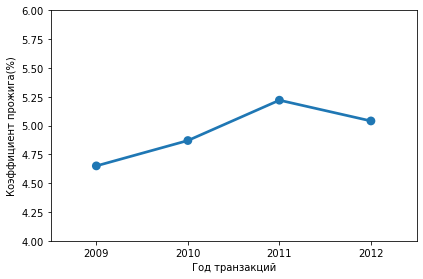

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pointplot(data = burn_rate_year, 
              x='year_transaction', 
              y='burn_rate_pct')
plt.ylim(4,6)
plt.tight_layout()
plt.xlabel('Год транзакций')
plt.ylabel('Коэффициент прожига(%)')
plt.show()

In [20]:
print("2. Эффективность и результативность продвижения по подкатегориям товаров по 2012г.")
# Таблица для рассчета коэффициента прожига рекламной акции вцелом на основе подкатегории
burn_rate_sub_category = data[data['order_status'] == 'Order Finished'].groupby(['year_transaction', 'product_sub_category'], as_index=False)[['discount_value','sales']].sum()
burn_rate_sub_category['burn_rate_pct'] = round(burn_rate_sub_category['discount_value']/burn_rate_sub_category['sales'] * 100, 2)
burn_rate_sub_category = pd.DataFrame(burn_rate_sub_category)
burn_rate_sub_category = burn_rate_sub_category.loc[burn_rate_sub_category['year_transaction'] == 2012]
burn_rate_sub_category = burn_rate_sub_category.sort_values(by ='burn_rate_pct', ascending=False)
burn_rate_sub_category

2. Эффективность и результативность продвижения по подкатегориям товаров по 2012г.


,year_transaction,product_sub_category,discount_value,sales,burn_rate_pct
64,2012,"Scissors, Rulers & Trimmers",2349280,36776400,6.39
53,2012,Bookcases,10024365,159984680,6.27
52,2012,Binders & Binder Accessories,22338980,363879200,6.14
60,2012,Office Machines,46616695,811427140,5.75
51,2012,Appliances,14393300,266131100,5.41
62,2012,Pens & Art Supplies,2343501,43818480,5.35
65,2012,Storage & Organization,18802166,356714140,5.27
55,2012,Computer Peripherals,15333293,308014340,4.98
56,2012,Copiers & Fax,14530870,292489800,4.97
61,2012,Paper,6224694,126896160,4.91


График процента выгорания в разбивке по подкатегориям


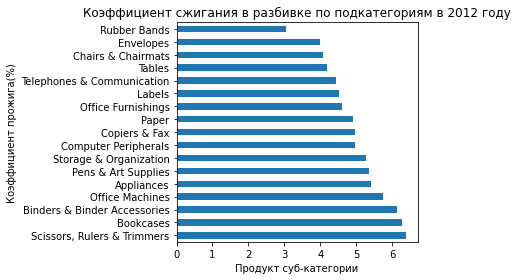

In [21]:
print("График процента выгорания в разбивке по подкатегориям")

burn_rate_sub_category.plot(x='product_sub_category', y='burn_rate_pct', kind='barh', title='Коэффициент сжигания в разбивке по подкатегориям в 2012 году')
plt.xlabel('Продукт суб-категории')
plt.ylabel('Коэффициент прожига(%)')
plt.legend().set_visible(False) # убрали видмость легенды
plt.tight_layout()
plt.show()

In [22]:
print("3. Транзакции клиентов в год")
print("\n3.1 Количество клиентов, совершивших транзакцию, по годам")

# таблица - Количество Клиентов, совершивших Транзакцию, по годам

num_customer = data[data['order_status'] == 'Order Finished'].groupby('year_transaction', as_index=False)['customer'].nunique()
# nunique считает кол-во уникальных записей. Не sum, т.к. 1 чел мог совершить несколько покупок
num_customer

3. Транзакции клиентов в год

3.1 Количество клиентов, совершивших транзакцию, по годам


,year_transaction,customer
0,2009,585
1,2010,593
2,2011,581
3,2012,594


График количества Клиентов, совершивших транзакцию, по годам


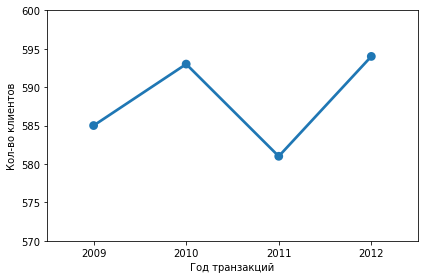

In [23]:
print("График количества Клиентов, совершивших транзакцию, по годам")

sns.pointplot(data = num_customer, 
              x='year_transaction', 
              y='customer')
plt.ylim(570, 600)
plt.tight_layout()
plt.xlabel('Год транзакций')
plt.ylabel('Кол-во клиентов')
plt.show()

In [24]:
print("3.2 Привлечение клиентов в год")

# таблица - Количество новых клиентов каждый год. Показаны все имена людей и выходит большая табл
customer = pd.DataFrame(data['customer'].unique())
customer.columns = ['customer']
# Для каждого покупателя смотрим ранний год покупки - это будет "первым годом"
first_year = data[data['order_status'] == 'Order Finished'].groupby('customer').year_transaction.min().reset_index()
first_year.columns = ['customer', 'first_year_as_customer']
customer = pd.merge(customer, first_year[['customer','first_year_as_customer']], on='customer')
customer

3.2 Привлечение клиентов в год


,customer,first_year_as_customer
0,Muhammed Mac Intyre,2009
1,Barry French,2010
2,Clay Rozendal,2009
3,Carlos Soltero,2009
4,Carl Jackson,2010
...,...,...
770,Catherine Glotzbach,2010
771,Frank Olsen,2009
772,Alice Mc Carthy,2010
773,Frank Merwin,2010


In [25]:
# таблица - Суммарное количество новых клиентов каждый год. Показано общ кол-во по годам
customer = pd.DataFrame(customer)
customer = customer.groupby('first_year_as_customer', as_index=False)['customer'].count()#количество записей
# если сделать sum- то будут переданы все имена покупателей
customer

,first_year_as_customer,customer
0,2009,585
1,2010,141
2,2011,38
3,2012,11


График - Количество новых клиентов по годам


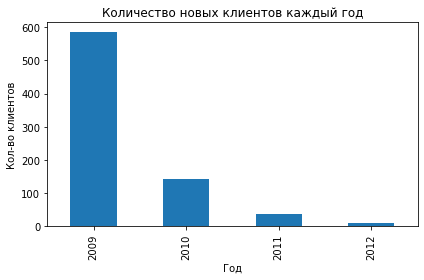

In [26]:
print("График - Количество новых клиентов по годам")
customer.plot(x='first_year_as_customer', y='customer', kind='bar', title='Количество новых клиентов каждый год')
plt.xlabel('Год')
plt.ylabel('Кол-во клиентов')
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

Удержание клиентов по показателям 2012г

In [27]:
# полная таблица с исходными данными + новые колонки
data1['year_transaction'] = data1['year_transaction'].astype(int)
data2 = data1.loc[data1['year_transaction'] == 2012]
data2['month_transaction'] = data2['order_date'].dt.month # показывает только номер месяца из полной даты

customer_by_month = data2.groupby('customer')['month_transaction']
#transform('min') - преобразует данные таблицы от мин к макс
data2['first_transaction_month'] = customer_by_month.transform('min')
data2['lifetime'] = data2['month_transaction'] - data2['first_transaction_month']
data2

C:\Users\570B~1\AppData\Local\Temp/ipykernel_8280/2441302998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['year_transaction'] = data1['year_transaction'].astype(int)
C:\Users\570B~1\AppData\Local\Temp/ipykernel_8280/2441302998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['month_transaction'] = data2['order_date'].dt.month # показывает только номер месяца из полной даты
C:\Users\570B~1\AppData\Local\Temp/ipykernel_8280/2441302998.py:8: SettingWithCopyWarning: 
A value is trying to b

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category,year_transaction,month_transaction,first_transaction_month,lifetime
1,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances,2012,10,2,8
8,868,Order Finished,Carlos Daly,2012-06-08,32,1433680,0.00,0,Office Supplies,Appliances,2012,6,6,0
9,933,Order Finished,Claudia Miner,2012-08-04,15,161220,0.02,3224,Office Supplies,Binders & Binder Accessories,2012,8,4,4
12,1154,Order Finished,Sylvia Foulston,2012-02-14,44,8924460,0.04,356978,Furniture,Bookcases,2012,2,2,0
13,1344,Order Finished,Jim Radford,2012-04-15,15,1669808,0.06,100188,Technology,Telephones & Communication,2012,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475,52673,Order Finished,Jas O'Carroll,2012-05-08,14,4090132,0.07,286309,Technology,Telephones & Communication,2012,5,5,0
5476,53026,Order Finished,Eva Jacobs,2012-02-26,35,645640,0.05,32282,Office Supplies,"Scissors, Rulers & Trimmers",2012,2,1,1
5483,57152,Order Finished,Philip Brown,2012-09-03,6,45780,0.08,3662,Office Supplies,Binders & Binder Accessories,2012,9,9,0
5489,5767,Order Finished,Lisa De Cherney,2012-04-28,36,327080,0.03,9812,Office Supplies,Binders & Binder Accessories,2012,4,4,0


In [28]:
# информация по общему кол-ву покупателей, месяцем первой транзакции и циклу между последнем и первым месяцем
customer_by_month = data2.groupby(['first_transaction_month','lifetime'])
# apply - Применение функции
cohort_data = customer_by_month['customer'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data

,first_transaction_month,lifetime,customer
0,1,0,95
1,1,1,14
2,1,2,20
3,1,3,17
4,1,4,12
...,...,...,...
73,10,1,5
74,10,2,2
75,11,0,18
76,11,1,3


In [29]:
print("Коэффициент удержания пользователей(%) - месячная когорта в 2012г")
# Присвоение имен столбцов фрейму данных, созданному выше
cohort_counts = cohort_data.pivot(index='first_transaction_month',
                                 columns ='lifetime',
                                 values = 'customer')
#iloc - поиск строки или столбца по его «целочисленному индексу» : -все строки и 0 - 1 столбец
cohort_sizes = cohort_counts.iloc[:,0]
# divide() истинное деление + корректирует тип данных выходного массива вне зависимости от типов данных входных массивов.
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Преобразование коэффициента удержания в проценты и округление.
retention = retention.round(3)*100
retention

Коэффициент удержания пользователей(%) - месячная когорта в 2012г


lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_transaction_month,,,,,,,,,,,,
1,100.0,14.7,21.1,17.9,12.6,8.4,10.5,14.7,21.1,18.9,13.7,18.9
2,100.0,13.9,13.9,11.1,20.8,6.9,15.3,15.3,16.7,11.1,9.7,NaN
3,100.0,13.4,18.3,12.2,17.1,13.4,9.8,9.8,8.5,7.3,NaN,NaN
4,100.0,23.1,7.7,12.3,13.8,21.5,12.3,10.8,15.4,NaN,NaN,NaN
5,100.0,9.4,14.1,17.2,9.4,10.9,12.5,9.4,NaN,NaN,NaN,NaN
6,100.0,7.1,19.0,9.5,26.2,16.7,9.5,NaN,NaN,NaN,NaN,NaN
7,100.0,9.1,11.4,11.4,2.3,6.8,NaN,NaN,NaN,NaN,NaN,NaN
8,100.0,18.9,13.5,5.4,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100.0,12.9,6.5,12.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Коэффициент удержания пользователей(%) - месячная когорта в 2012г')

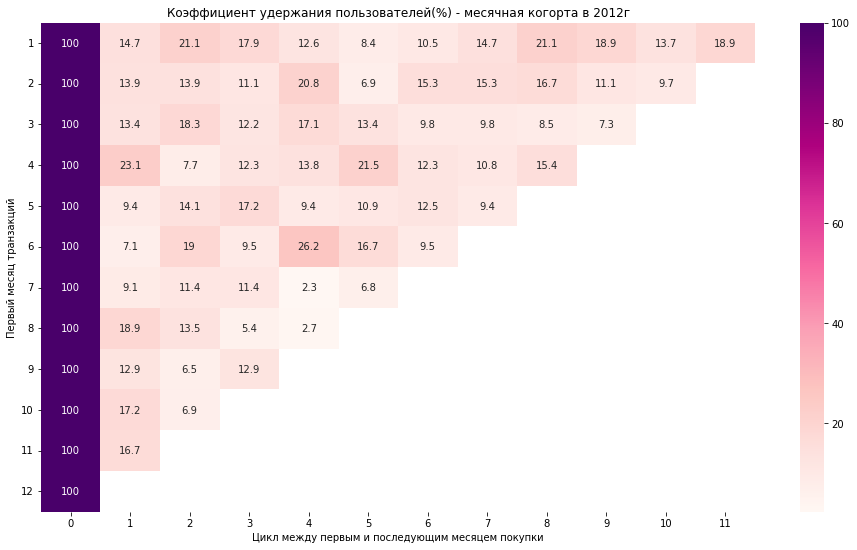

In [30]:
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(retention, annot=True, fmt='g', cmap='RdPu')
plt.ylabel('Первый месяц транзакций')
plt.xlabel('Цикл между первым и последующим месяцем покупки')
plt.yticks(rotation=0)
plt.title('Коэффициент удержания пользователей(%) - месячная когорта в 2012г')